This notebook is for classification on the relative risk dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(1, '../scripts/')
from utils import *
from processing import *

# Loading Data

In [2]:
# Relative Risk with PTS
data = pd.read_csv("../csv/relative_1hr_lead_1hr_obs_data/relative_1hr_lead_1hr_obs_dataset_no_pts_rf_imputed.csv")
labels = data['Class']
data.drop(['Class'], axis=1, inplace=True)
data

PatientStayID      LOS   Age  APACHEIVscore  UrgentAdmission  NumBeds  \
0             200923  12885.0  79.0          84.00              0.0      4.0   
1             213517  51425.0  49.0         117.00              0.0      4.0   
2             242154   5580.0  46.0          77.00              0.0      4.0   
3             242505   5840.0  90.0          78.00              0.0      4.0   
4             246416   1314.0  89.0          65.00              0.0      4.0   
...              ...      ...   ...            ...              ...      ...   
16975        3200031   3453.0  63.0          66.18              0.0      4.0   
16976        3200331    673.0  23.0          79.00              0.0      4.0   
16977        3328663  11215.0  48.0          77.00              0.0      4.0   
16978        3343219    250.0  41.0          41.00              0.0      2.0   
16979        3349777  21681.0  60.0          33.00              0.0      4.0   

       TeachingStatus  Gender  AdmitHeight  AdmitWeight  ...  \
0                 1.0     1.0       162.60        99.20  ...   
1                 1.0     1.0       188.00       130.50  ...   
2                 0.0     1.0       157.48        53.09  ...   
3                 0.0     1.0       165.10        61.80  ...   
4                 0.0     0.0       177.80        75.00  ...   
...               ...     ...          ...          ...  ...   
16975             1.0     1.0       165.00        72.50  ...   
16976             1.0     1.0       173.00        50.90  ...   
16977             0.0     1.0       170.10       109.30  ...   
16978             0.0     1.0       165.10        90.70  ...   
16979             0.0     0.0       182.90        87.00  ...   

       UnitAdmitSource_OR  UnitAdmitSource_Other  \
0                     0.0                    0.0   
1                     0.0                    0.0   
2                     0.0                    0.0   
3                     0.0                    0.0   
4                     0.0                    0.0   
...                   ...                    ...   
16975                 0.0                    0.0   
16976                 0.0                    0.0   
16977                 0.0                    0.0   
16978                 0.0                    0.0   
16979                 0.0                    0.0   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
0                                0.0                   0.0   
1                                1.0                   0.0   
2                                0.0                   0.0   
3                                0.0                   0.0   
4                                0.0                   0.0   
...                              ...                   ...   
16975                            0.0                   0.0   
16976                            0.0                   0.0   
16977                            0.0                   0.0   
16978                            0.0                   0.0   
16979                            0.0                   0.0   

       UnitAdmitSource_SDU  UnitStayType_Admit  UnitStayType_Readmit  \
0                      1.0                 0.0                   1.0   
1                      0.0                 1.0                   0.0   
2                      0.0                 1.0                   0.0   
3                      0.0                 1.0                   0.0   
4                      0.0                 1.0                   0.0   
...                    ...                 ...                   ...   
16975                  0.0                 0.0                   0.0   
16976                  0.0                 1.0                   0.0   
16977                  0.0                 1.0                   0.0   
16978                  0.0                 1.0                   0.0   
16979                  0.0                 1.0                   0.0   

       UnitStayType_Stepdown  UnitStayType

In [3]:
from sklearn import preprocessing

standard_data = data.copy()
scaler = preprocessing.StandardScaler()
standard_data.iloc[:,1:] = scaler.fit_transform(data.iloc[:,1:])
standard_data

PatientStayID        LOS       Age  APACHEIVscore  UrgentAdmission  \
0             200923   2.728249  0.928486       1.079041         -0.34371   
1             213517  12.959713 -0.872436       2.405742         -0.34371   
2             242154   0.788944 -1.052528       0.797620         -0.34371   
3             242505   0.857967  1.588824       0.837823         -0.34371   
4             246416  -0.343579  1.528794       0.315183         -0.34371   
...              ...        ...       ...            ...              ...   
16975        3200031   0.224275 -0.032006       0.362622         -0.34371   
16976        3200331  -0.513750 -2.433236       0.878026         -0.34371   
16977        3328663   2.284904 -0.932467       0.797620         -0.34371   
16978        3343219  -0.626046 -1.352682      -0.649691         -0.34371   
16979        3349777   5.063380 -0.212098      -0.971315         -0.34371   

        NumBeds  TeachingStatus    Gender  AdmitHeight  AdmitWeight  ...  \
0      0.835091        1.357670  1.059701    -0.367597     0.548698  ...   
1      0.835091        1.357670  1.059701     1.126488     1.688292  ...   
2      0.835091       -0.736556  1.059701    -0.668767    -1.130110  ...   
3      0.835091       -0.736556  1.059701    -0.220541    -0.812990  ...   
4      0.835091       -0.736556 -0.943764     0.526501    -0.332394  ...   
...         ...             ...       ...          ...          ...  ...   
16975  0.835091        1.357670  1.059701    -0.226423    -0.423416  ...   
16976  0.835091        1.357670  1.059701     0.244155    -1.209845  ...   
16977  0.835091       -0.736556  1.059701     0.073570     0.916426  ...   
16978 -1.618394       -0.736556  1.059701    -0.220541     0.239224  ...   
16979  0.835091       -0.736556 -0.943764     0.826495     0.104511  ...   

       UnitAdmitSource_OR  UnitAdmitSource_Other  \
0               -0.274897               -0.03434   
1               -0.274897               -0.03434   
2               -0.274897               -0.03434   
3               -0.274897               -0.03434   
4               -0.274897               -0.03434   
...                   ...                    ...   
16975           -0.274897               -0.03434   
16976           -0.274897               -0.03434   
16977           -0.274897               -0.03434   
16978           -0.274897               -0.03434   
16979           -0.274897               -0.03434   

       UnitAdmitSource_OtherHospital  UnitAdmitSource_PACU  \
0                          -0.189397             -0.239206   
1                           5.279920             -0.239206   
2                          -0.189397             -0.239206   
3                          -0.189397             -0.239206   
4                          -0.189397             -0.239206   
...                              ...                   ...   
16975                      -0.189397             -0.239206   
16976                      -0.189397             -0.239206   
16977                      -0.189397             -0.239206   
16978                      -0.189397             -0.239206   
16979                      -0.189397             -0.239206   

       UnitAdmitSource_SDU  UnitStayType_Admit  UnitStayType_Readmit  \
0                 5.522932           -2.439942              4.337430   
1                -0.181063            0.409846             -0.230551   
2                -0.181063            0.409846             -0.230551   
3                -0.181063            0.409846             -0.230551   
4                -0.181063            0.409846             -0.230551   
...                    ...                 ...                   ...   
16975            -0.181063           -2.439942             -0.230551   
16976            -0.181063            0.409846             -0.230551   
16977            -0.181063            0.409846             -0.230551   
16978            -0.181063            0.409846             -0.230551   
16979  

# Visualize Data

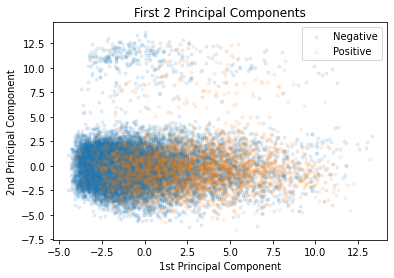

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(standard_data.iloc[:,1:])
plt.figure()
plt.scatter(pca_data[labels==0][:, 0], pca_data[labels==0][:, 1], alpha = 0.1, marker='.')
plt.scatter(pca_data[labels==1][:, 0], pca_data[labels==1][:, 1], alpha=0.1, marker='.')
plt.legend(["Negative", "Positive"])
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.title("First 2 Principal Components")
plt.show()

# Logistic Regression

In [5]:
lr_calibrated = run_cross_validation(standard_data, "LogisticRegression", {"penalty" : ['l1'], "max_iter" : [100], "class_weight" : ["balanced"], "C" : [0.005, 0.01, 0.015, 0.02, 0.025, 0.03], "solver" : ["liblinear"]}, "from sklearn.linear_model import LogisticRegression", run_once = False, bayes=False, dataset="/relative_1hr_lead_1hr_obs_data/relative_1hr_lead_1hr_obs", calibrate=True, outer_tuning=True, outer_labels=labels)

Fold 0:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 1:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 2:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Fold 3:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Outer:
{'C': 0.02, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


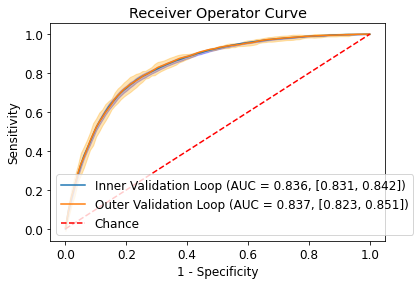

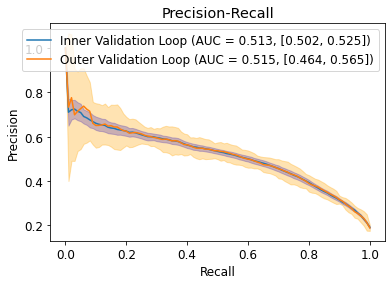

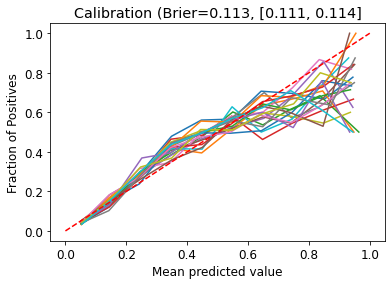

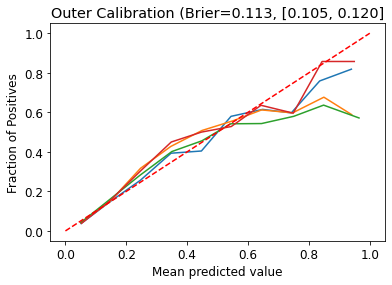

In [6]:
result_dict = lr_calibrated
name = "relative_1hr_lead_1hr_obs/rf_unpruned/lr_calibrated"
base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

In [7]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

sel_ = SelectFromModel(LogisticRegression(**lr_calibrated["oparam"]))
sel_.fit(standard_data.iloc[:,1:], labels)

SelectFromModel(estimator=LogisticRegression(C=0.02, class_weight='balanced',
                                             penalty='l1', solver='liblinear'))

In [8]:
selected_feat = (data.iloc[:,1:]).columns[(sel_.get_support())]
print(len(selected_feat))
for i in range(len(selected_feat)):
    print(selected_feat[i])

with open("../pickle/relative_1hr_lead_1hr_obs/rf_unpruned/lr_calibrated_selected_feats.pkl", "wb") as f:
    pickle.dump(selected_feat, f)

123
LOS
Age
APACHEIVscore
UrgentAdmission
NumBeds
TeachingStatus
Gender
AdmitHeight
HistAICD
HistAngina
HistCABG
HistHypertension
HistPacemaker
HistPulmEmb
HistHeartTransp
HistHypercalcemia
Histhyperthyroid
Histhypothyroid
HistSteroid Use
HistHypersplenism
HistPUD
HistChemotherapy
HistRadiationTherapy
HistHemolyticAnemia
HistOncology
HistSickleCellDisease
HistImmuneSuppr
HistDementia
HistSeizures
HistTIA
HistCOPD
HistRestrictiveDis
HistStoneDisease
HistRenalInsuff
HistRheumatic
relative_1hr_lead_1hr_obsAdrenergicBronchodilators
relative_1hr_lead_1hr_obsaminoglycosides
relative_1hr_lead_1hr_obsAnticholinergicBronchodilators
relative_1hr_lead_1hr_obsAntidiarrheals
relative_1hr_lead_1hr_obsAntihistamines
relative_1hr_lead_1hr_obsBenzodiazepines
relative_1hr_lead_1hr_obsCarbapenems
relative_1hr_lead_1hr_obsCephalosporins
relative_1hr_lead_1hr_obsDiuretics
relative_1hr_lead_1hr_obsGeneralAnesthetics
relative_1hr_lead_1hr_obsGlucoseElevating
relative_1hr_lead_1hr_obsGlycopeptides
relative_1h

In [9]:
dropped_feat = (data.iloc[:,1:]).columns[np.logical_not(sel_.get_support())]
print(len(dropped_feat))
for i in range(len(dropped_feat)):
    print(dropped_feat[i])

with open("../pickle/relative_1hr_lead_1hr_obs/rf_unpruned/lr_calibrated_dropped_feats.pkl", "wb") as f:
    pickle.dump(dropped_feat, f)

85
AdmitWeight
HistArrythmia
HistCHF
HistExerciseTol
HistMI
HistPVD
HistPCI
HistValveDis
HistVenThromb
HistCushing
Histdiabetes
HistCirrhosis
HistLiverTransp
HistAplasticAnemia
HistCancer
HistClottingDisorder
HistHypercoagulableCondition
HistMyeloproliferativeDisease
HistIntracranialMass
HistNeuromuscularDis
HistStrokes
HistAsthma
HistRespiratoryFail
HistLungTransp
HistSarcoidosis
HistNeurogenicBladd
HistRenalFail
HistRTA
HistRenalTransp
relative_1hr_lead_1hr_obsAnticholinergics
relative_1hr_lead_1hr_obsAnticoagulants
relative_1hr_lead_1hr_obsAntiemetics
relative_1hr_lead_1hr_obsBarbiturates
relative_1hr_lead_1hr_obsBetaBlockers
relative_1hr_lead_1hr_obsCalciumChannelBlockers
relative_1hr_lead_1hr_obsClassVAntiarrhythmics
relative_1hr_lead_1hr_obsColloidFluids
relative_1hr_lead_1hr_obsCrystalloidFluids
relative_1hr_lead_1hr_obsGlucocorticoids
relative_1hr_lead_1hr_obsInsulins
relative_1hr_lead_1hr_obsMAOIAntidepressants
relative_1hr_lead_1hr_obsMethylxanthines
relative_1hr_lead_1hr_obs

In [10]:
with open("../pickle/relative_1hr_lead_1hr_obs/rf_unpruned/lr_calibrated_dropped_feats.pkl", "rb") as f:
    dropped_feat = pickle.load(f)

data_pruned = data.drop(labels=dropped_feat, axis=1)

In [11]:
# Coefficients
clf = LogisticRegression(**lr_calibrated["oparam"])
clf.fit(standard_data.iloc[:,1:], labels)
# Visualizing Coefficients
sorted_selected_feat = data.iloc[:,1:].columns[np.argsort(-np.abs(clf.coef_))]
sorted_coeff = clf.coef_[0][np.argsort(-np.abs(clf.coef_))]

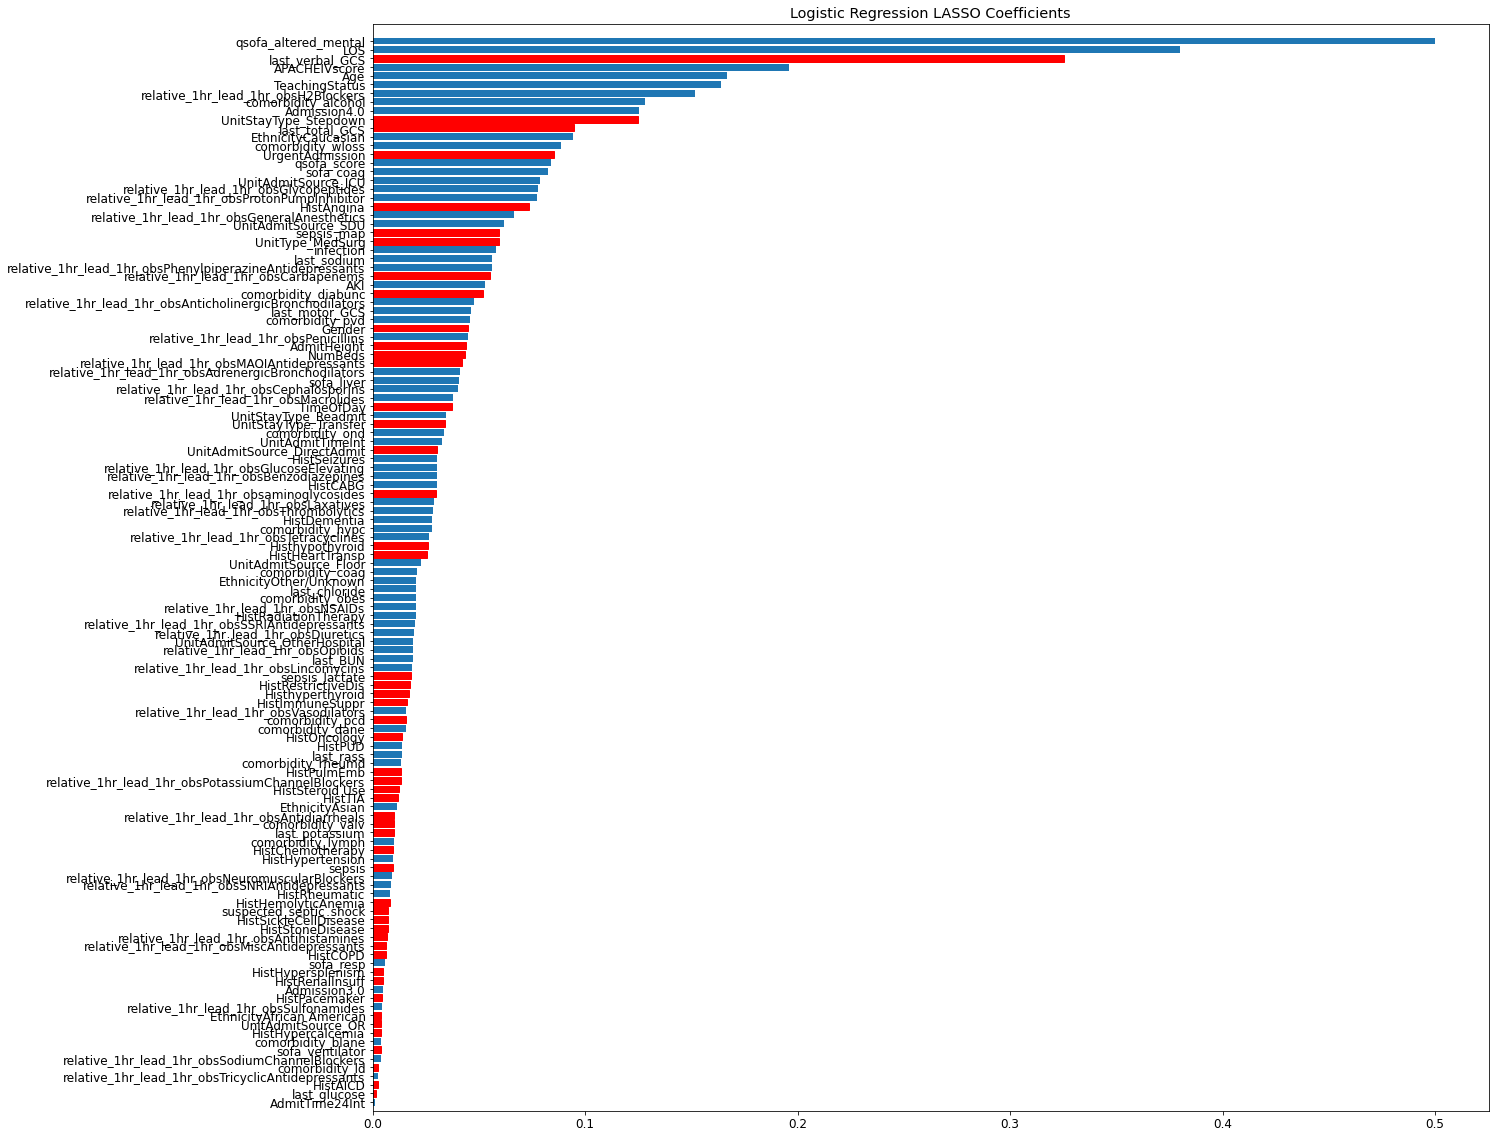

In [12]:
plt.figure(figsize=(20,20))
x = np.flip(np.arange(len(selected_feat)))
barlist = plt.barh(x, np.abs(sorted_coeff[0][:len(selected_feat)]))
plt.yticks(x, sorted_selected_feat[0][:len(selected_feat)])
plt.ylim(-1, len(selected_feat)+1)
temp = np.where(sorted_coeff[0][:len(selected_feat)] < 0)[0]
for i in temp:
    barlist[i].set_color('r')
plt.title("Logistic Regression LASSO Coefficients")
plt.show()

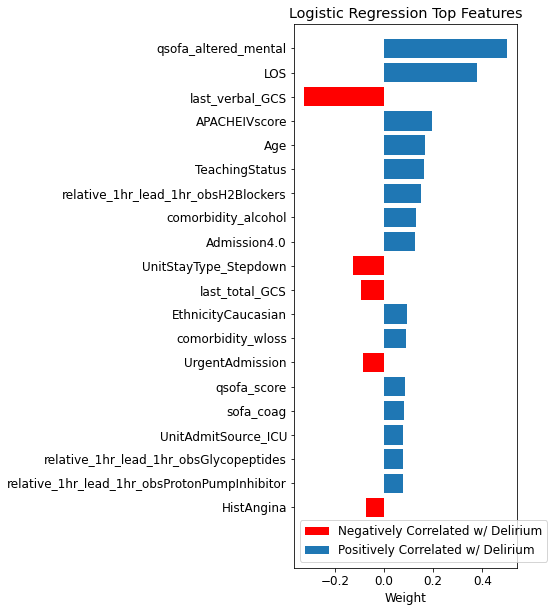

In [13]:
x = np.flip(np.arange(20))
plt.figure(figsize=(4,10))
temp = np.where(sorted_coeff[0][:20] < 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]), color='r')
temp = np.where(sorted_coeff[0][:20] >= 0)[0]
plt.barh(x[temp], (sorted_coeff[0][temp]))

temp = sorted_selected_feat[0][:20]
temp_x = ["Mean Verbal GCS",
        "Min Bicarbonate",
        "APACHE IV Score",
        "Neurology Admission",
        "Max BUN",
        "Min RBC",
        "Precedex",
        "Max Potassium",
        "History of Dementia",
        "Age",
        "Adrenergic Bronchodilators",
        "Trauma Admission",
        "Min Chloride",
        "Anticoagulants",
        "General Anesthetics",
        "Stepdown Unit",
        "Haloperidol",
        "History of Angina",
        "Stepdown Unit",
        "ICU Admit Source",
        "Min MCH"]

plt.yticks(x, temp)
plt.ylim(-2.5, 20)

plt.title("Logistic Regression Top Features")
plt.legend(["Negatively Correlated w/ Delirium", "Positively Correlated w/ Delirium"])
#plt.tight_layout()
plt.xlabel("Weight")
plt.savefig('../figures/relative_1hr_lead_1hr_obs/rf_unpruned/lr_calibrated_coefficients_short.png', dpi=500,bbox_inches = "tight")
plt.show()

# Random Forest

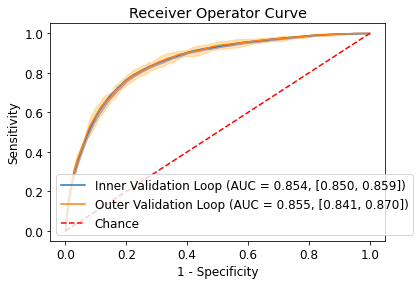

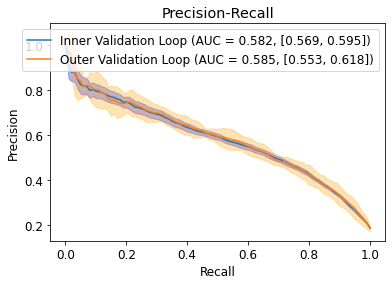

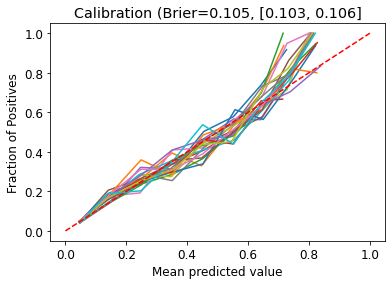

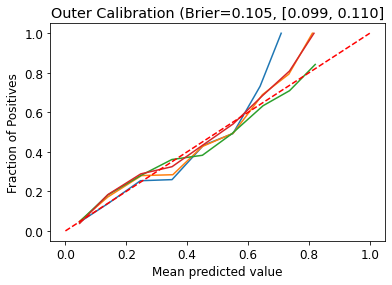

In [51]:
with open("../pickle/relative_1hr_lead_1hr_obs/mean_unpruned/rf", "rb") as f:
    rf_result = pickle.load(f)

result_dict = rf_result
name = "/relative_1hr_lead_1hr_obs/mean_unpruned/rf"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

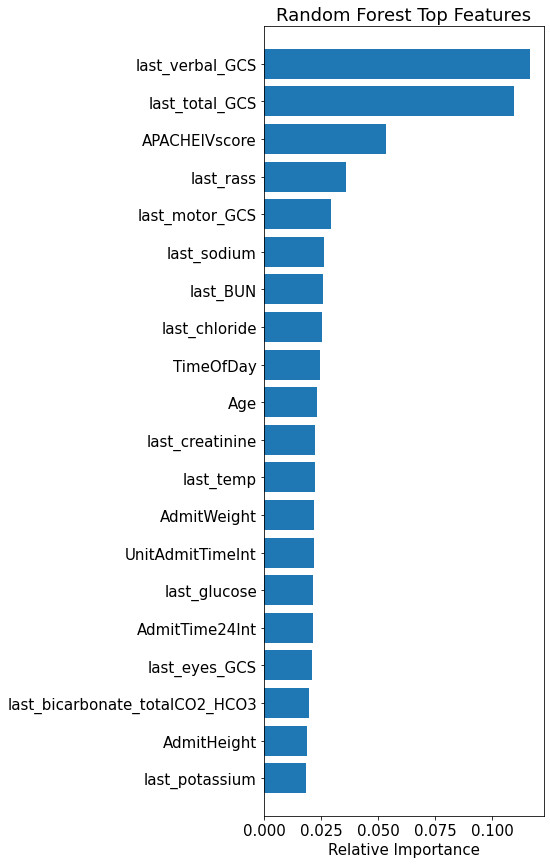

In [52]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_result["oparam"])
clf.fit(data.iloc[:,1:], labels)

importances = clf.feature_importances_
sorted_selected_feat = data.iloc[:,1:].columns[np.argsort(-np.abs(importances))]
sorted_coeff = importances[np.argsort(-np.abs(importances))]
random_forest_sorted_selected_feat = np.copy(sorted_selected_feat)

num_features=20
x = np.flip(np.arange(len(sorted_selected_feat[:num_features])))

plt.figure(figsize=(8,12))
plt.rcParams.update({'font.size': 15})
barlist = plt.barh(x, np.abs(sorted_coeff[:num_features]))
temp = sorted_selected_feat[:20]
temp_x = ["Mean Verbal GCS",
"Mean Total GCS",
"APACHE IV Score",
"Mean Motor GCS",
"Mean Eyes GCS",
"Admit Weight",
"Mean Sodium",
"Age",
"Min Sodium",
"Unit Admit Time",
"Admit Time",
"Max RBC",
"Mean Bicarbonate",
"Admit Height",
"Max Sodium",
"Min Bicarbonate",
"Mean BUN",
"Mean RBC",
"Min BUN",
"Min Glucose"
]
plt.yticks(x, temp)
plt.ylim(-1, num_features)
plt.title("Random Forest Top Features")
plt.tight_layout()
plt.xlabel("Relative Importance")
plt.savefig("../figures/{}_feature_importance.png".format(name), bbox_inches = "tight")
plt.show()

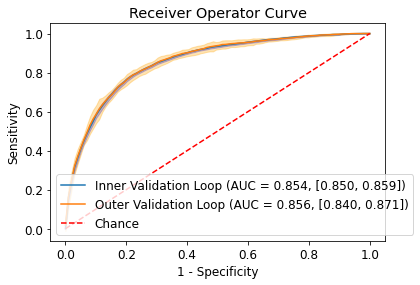

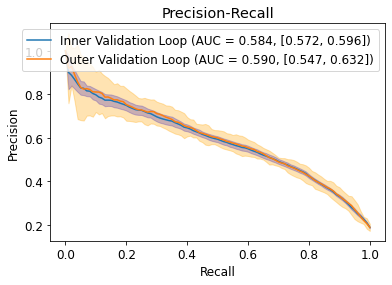

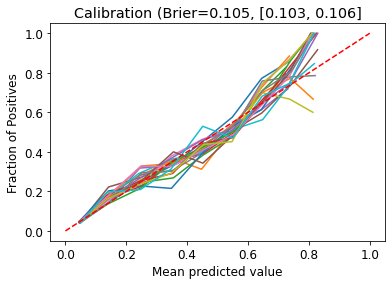

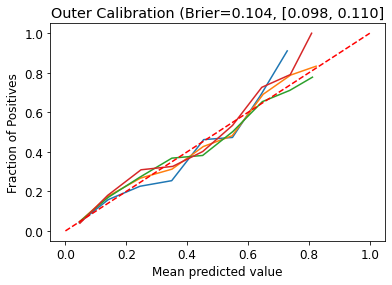

In [10]:
with open("../pickle/relative_1hr_lead_1hr_obs/mean_pruned/rf", "rb") as f:
    rf_result = pickle.load(f)

result_dict = rf_result
name = "/relative_1hr_lead_1hr_obs/mean_pruned/rf"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

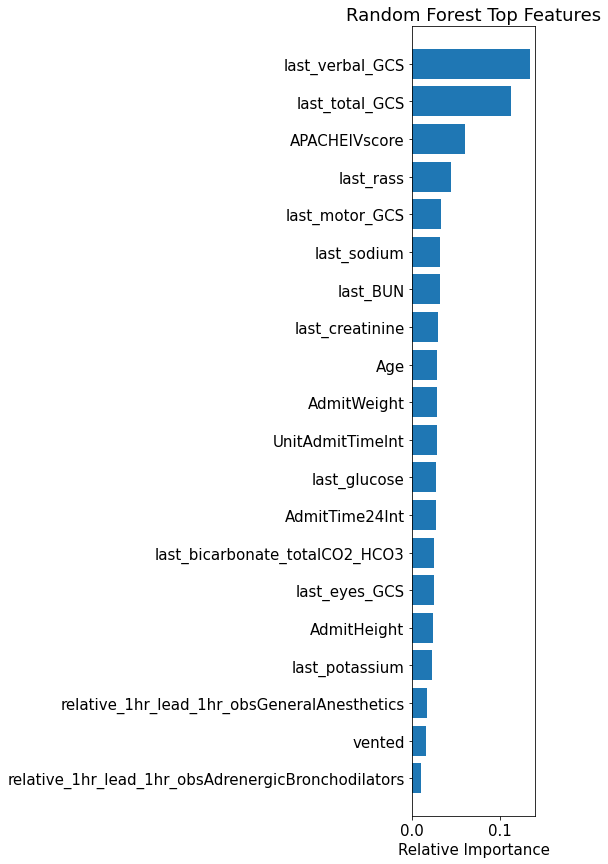

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(**rf_result["oparam"])
clf.fit(data_pruned.iloc[:,1:], labels)

importances = clf.feature_importances_
sorted_selected_feat = data_pruned.iloc[:,1:].columns[np.argsort(-np.abs(importances))]
sorted_coeff = importances[np.argsort(-np.abs(importances))]
random_forest_sorted_selected_feat = np.copy(sorted_selected_feat)

num_features=20
x = np.flip(np.arange(len(sorted_selected_feat[:num_features])))

plt.figure(figsize=(8,12))
plt.rcParams.update({'font.size': 15})
barlist = plt.barh(x, np.abs(sorted_coeff[:num_features]))
temp = sorted_selected_feat[:20]
temp_x = ["Mean Verbal GCS",
"Mean Total GCS",
"APACHE IV Score",
"Mean Motor GCS",
"Mean Eyes GCS",
"Admit Weight",
"Mean Sodium",
"Age",
"Min Sodium",
"Unit Admit Time",
"Admit Time",
"Max RBC",
"Mean Bicarbonate",
"Admit Height",
"Max Sodium",
"Min Bicarbonate",
"Mean BUN",
"Mean RBC",
"Min BUN",
"Min Glucose"
]
plt.yticks(x, temp)
plt.ylim(-1, num_features)
plt.title("Random Forest Top Features")
plt.tight_layout()
plt.xlabel("Relative Importance")
plt.savefig("../figures/{}_feature_importance.png".format(name), bbox_inches = "tight")
plt.show()

# CatBoost

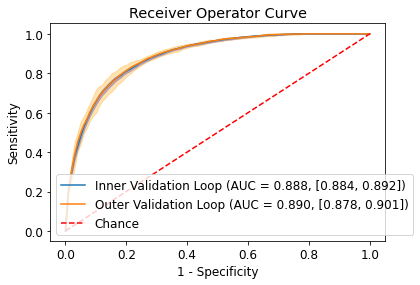

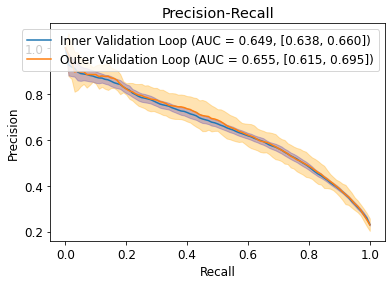

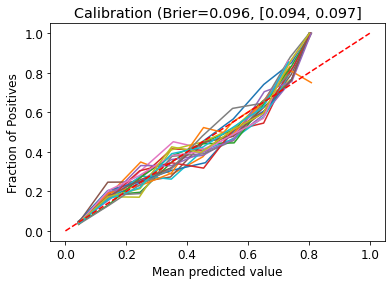

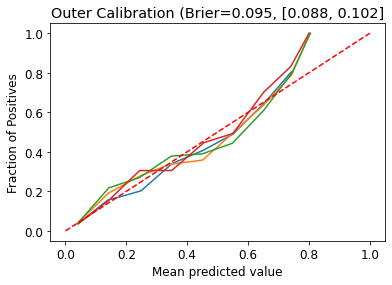

al: 1m 39s	remaining: 14s
2629:	learn: 0.2458789	total: 1m 39s	remaining: 14s
2630:	learn: 0.2458186	total: 1m 39s	remaining: 14s
2631:	learn: 0.2457636	total: 1m 39s	remaining: 13.9s
2632:	learn: 0.2456971	total: 1m 39s	remaining: 13.9s
2633:	learn: 0.2456487	total: 1m 39s	remaining: 13.8s
2634:	learn: 0.2456063	total: 1m 39s	remaining: 13.8s
2635:	learn: 0.2455530	total: 1m 39s	remaining: 13.8s
2636:	learn: 0.2455203	total: 1m 39s	remaining: 13.7s
2637:	learn: 0.2454762	total: 1m 39s	remaining: 13.7s
2638:	learn: 0.2454216	total: 1m 39s	remaining: 13.7s
2639:	learn: 0.2453714	total: 1m 39s	remaining: 13.6s
2640:	learn: 0.2453128	total: 1m 39s	remaining: 13.6s
2641:	learn: 0.2452564	total: 1m 40s	remaining: 13.6s
2642:	learn: 0.2452069	total: 1m 40s	remaining: 13.5s
2643:	learn: 0.2451564	total: 1m 40s	remaining: 13.5s
2644:	learn: 0.2451439	total: 1m 40s	remaining: 13.4s
2645:	learn: 0.2451035	total: 1m 40s	remaining: 13.4s
2646:	learn: 0.2450669	total: 1m 40s	remaining: 13.4s
2647:	

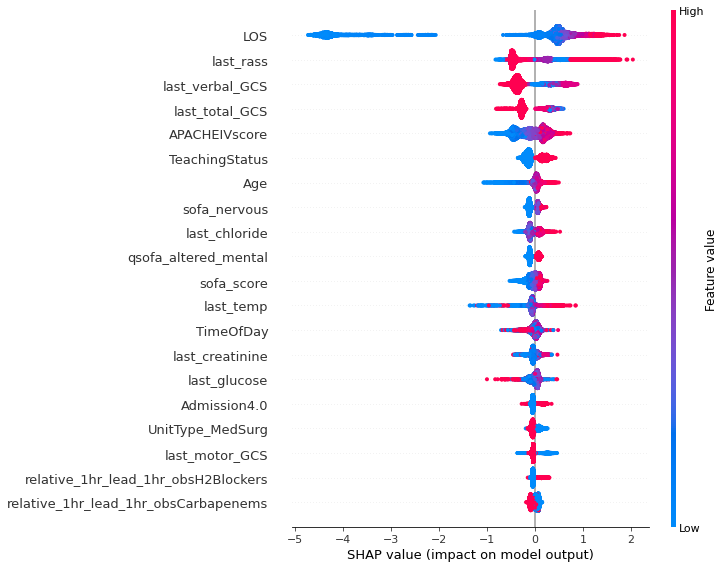

In [14]:
with open("../pickle/relative_1hr_lead_1hr_obs/rf_unpruned/catboost", "rb") as f:
    catboost_result = pickle.load(f)

result_dict = catboost_result
name = "/relative_1hr_lead_1hr_obs/rf_unpruned/catboost"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

import shap
from catboost import CatBoostClassifier
clf = CatBoostClassifier(**{"n_estimators": 3000, "auto_class_weights" : "Balanced"})
clf.fit(data.iloc[:,1:], labels)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(data.iloc[:, 1:])
shap.summary_plot(shap_values, data.iloc[:, 1:], show=False)
plt.savefig("../figures/{}_shapley_plot_full.png".format(name), bbox_inches="tight")

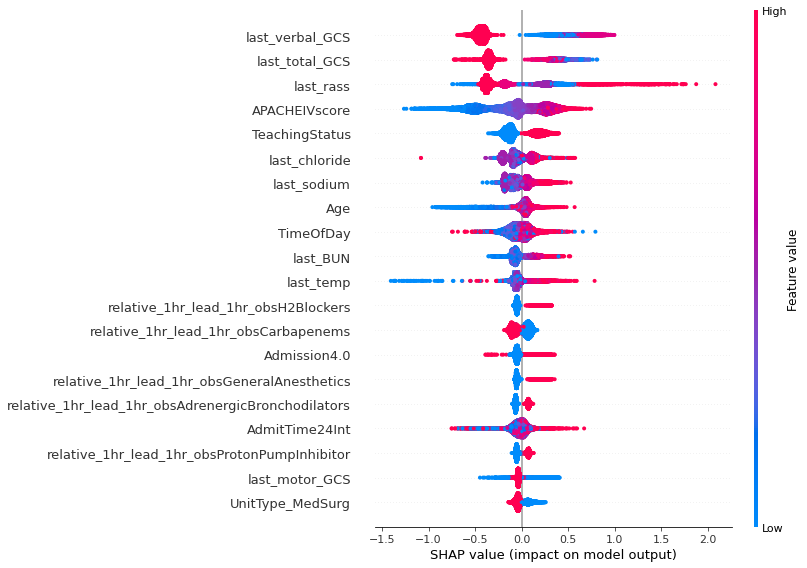

In [50]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(data.iloc[:, 1:])
shap.summary_plot(shap_values, data.iloc[:, 1:], show=False)
plt.savefig("../figures/{}_shapley_plot_full.png".format(name), bbox_inches="tight")

In [45]:
catboost_result["oparam"]

KeyError: 'oparam'

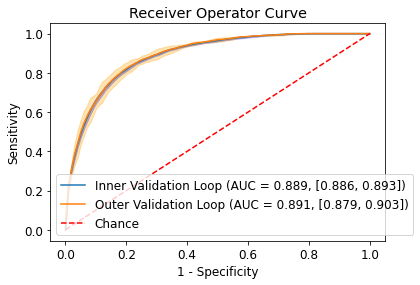

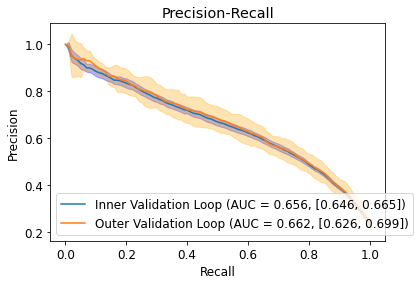

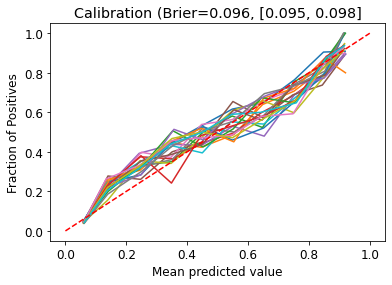

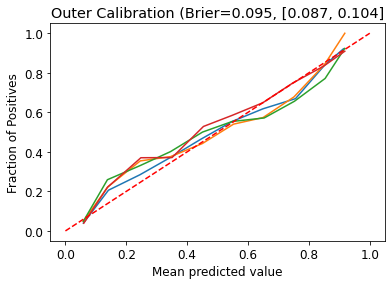

In [11]:
with open("../pickle/relative_1hr_lead_1hr_obs/mean_unpruned/catboost_unbalanced", "rb") as f:
    catboost_result = pickle.load(f)

result_dict = catboost_result
name = "/relative_1hr_lead_1hr_obs/mean_unpruned/catboost_unbalanced"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

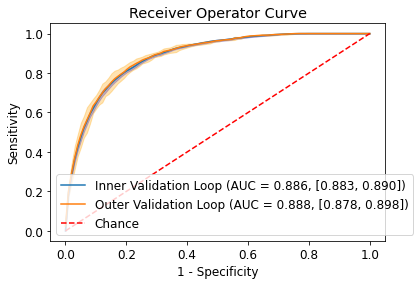

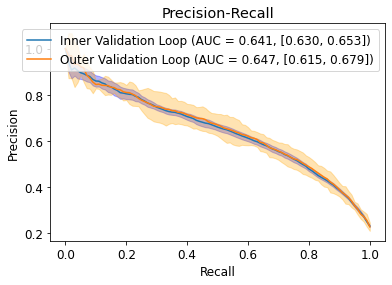

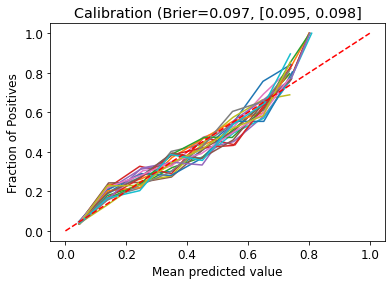

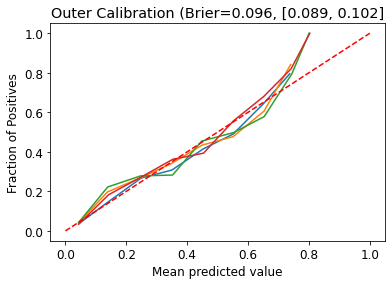

In [12]:
with open("../pickle/relative_1hr_lead_1hr_obs/mean_pruned/catboost", "rb") as f:
    catboost_result = pickle.load(f)

result_dict = catboost_result
name = "/relative_1hr_lead_1hr_obs/mean_pruned/catboost"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

remaining: 14.4s
2629:	learn: 0.2577385	total: 1m 42s	remaining: 14.4s
2630:	learn: 0.2576897	total: 1m 42s	remaining: 14.4s
2631:	learn: 0.2576345	total: 1m 42s	remaining: 14.3s
2632:	learn: 0.2575881	total: 1m 42s	remaining: 14.3s
2633:	learn: 0.2575387	total: 1m 42s	remaining: 14.2s
2634:	learn: 0.2574710	total: 1m 42s	remaining: 14.2s
2635:	learn: 0.2574241	total: 1m 42s	remaining: 14.2s
2636:	learn: 0.2573818	total: 1m 42s	remaining: 14.1s
2637:	learn: 0.2573304	total: 1m 42s	remaining: 14.1s
2638:	learn: 0.2572667	total: 1m 42s	remaining: 14s
2639:	learn: 0.2572281	total: 1m 42s	remaining: 14s
2640:	learn: 0.2571743	total: 1m 42s	remaining: 14s
2641:	learn: 0.2571248	total: 1m 42s	remaining: 13.9s
2642:	learn: 0.2570679	total: 1m 42s	remaining: 13.9s
2643:	learn: 0.2570285	total: 1m 42s	remaining: 13.9s
2644:	learn: 0.2569870	total: 1m 42s	remaining: 13.8s
2645:	learn: 0.2569339	total: 1m 42s	remaining: 13.8s
2646:	learn: 0.2569096	total: 1m 43s	remaining: 13.7s
2647:	learn: 0.25

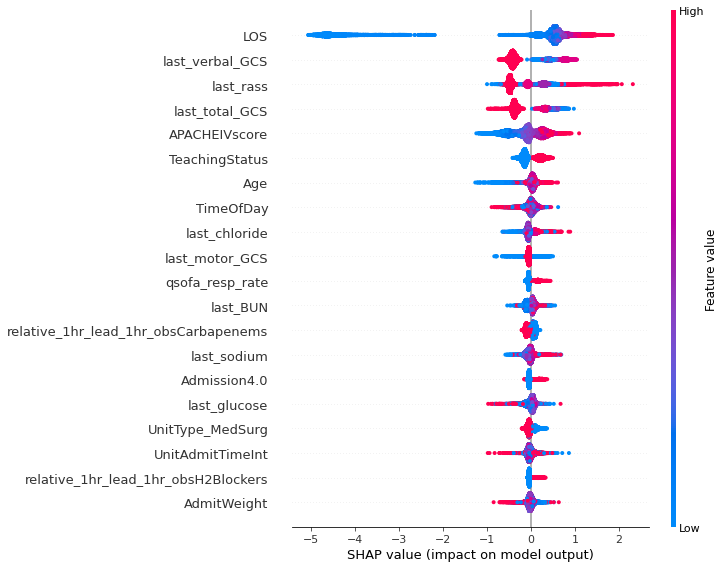

In [23]:
import shap
from catboost import CatBoostClassifier
clf = CatBoostClassifier(**{"n_estimators": 3000, "auto_class_weights" : "Balanced"})
clf.fit(data_pruned.iloc[:,1:], labels)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(data_pruned.iloc[:, 1:])
shap.summary_plot(shap_values, data_pruned.iloc[:, 1:], show=False)
plt.savefig("../figures/{}_shapley_plot_full.png".format(name), bbox_inches="tight")

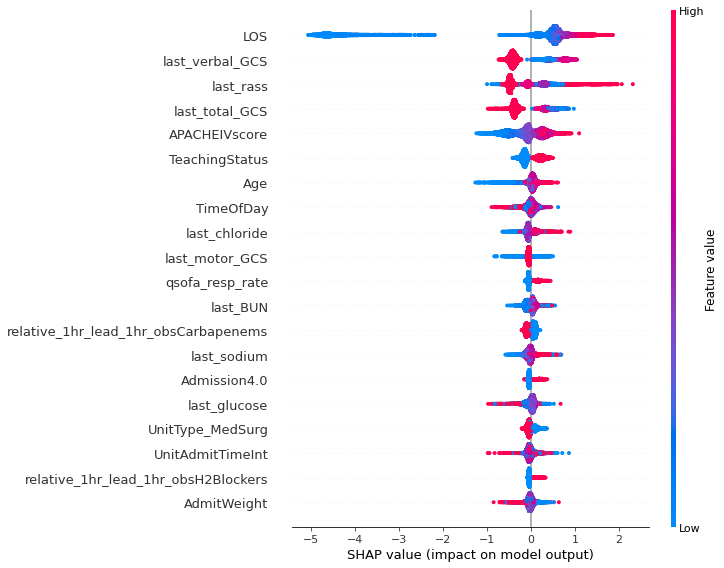

In [24]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(data_pruned.iloc[:, 1:])
shap.summary_plot(shap_values, data_pruned.iloc[:, 1:], show=False)
plt.savefig("../figures/{}_shapley_plot_full.png".format(name), bbox_inches="tight")

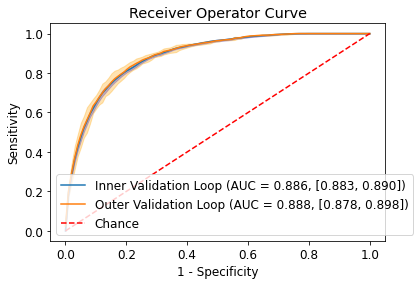

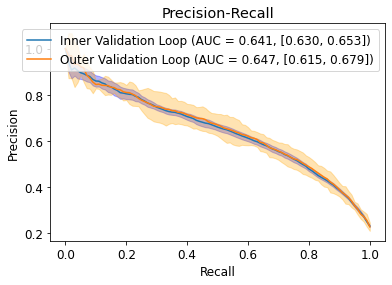

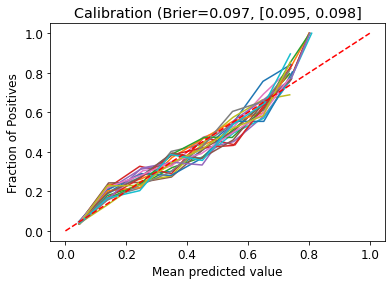

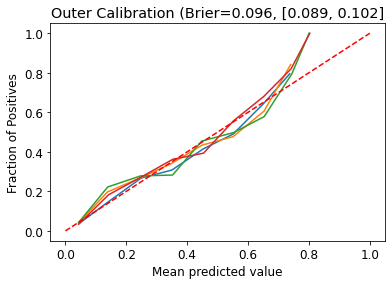

In [13]:
with open("../pickle/relative_1hr_lead_1hr_obs/mean_pruned/catboost_unbalanced", "rb") as f:
    catboost_result = pickle.load(f)

result_dict = catboost_result
name = "/relative_1hr_lead_1hr_obs/mean_pruned/catboost_unbalanced"

base_fpr = np.linspace(0, 1, 100)

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

# ROC's
inner_mid_tpr, inner_up_tpr, inner_low_tpr = compute_confidence(result_dict["itpr"])
inner_mid_auc, inner_up_auc, inner_low_auc = compute_confidence(result_dict["iauc"])
outer_mid_tpr, outer_up_tpr, outer_low_tpr = compute_confidence(result_dict["otpr"])
outer_mid_auc, outer_up_auc, outer_low_auc = compute_confidence(result_dict["oauc"])
training_mid_tpr, training_up_tpr, training_low_tpr = compute_confidence(result_dict["ttpr"])
training_mid_auc, training_up_auc, training_low_auc = compute_confidence(result_dict["tauc"])

plt.figure()
plt.plot(base_fpr, inner_mid_tpr, base_fpr, outer_mid_tpr, [0, 1], [0, 1], 'r--')
plt.fill_between(base_fpr, inner_low_tpr, inner_up_tpr, color='blue', alpha=0.3)
plt.fill_between(base_fpr, outer_low_tpr, outer_up_tpr, color='orange', alpha=0.3)
plt.xlabel("1 - Specificity") 
plt.ylabel("Sensitivity")
plt.title("Receiver Operator Curve")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(inner_mid_auc, inner_low_auc, inner_up_auc),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_auc, outer_low_auc, outer_up_auc),
    'Chance'))
plt.savefig("../figures/{}_ROC.png".format(name), dpi = 'figure')
plt.show()

mid_precision, up_precision, low_precision = compute_confidence(result_dict["ip"])
mid_ap, up_ap, low_ap = compute_confidence(result_dict["iap"])
base_recall = np.linspace(1,0,101)

outer_mid_precision, outer_up_precision, outer_low_precision = compute_confidence(result_dict["op"])
outer_mid_ap, outer_up_ap, outer_low_ap = compute_confidence(result_dict["oap"])


plt.figure()
plt.plot(base_recall, mid_precision, base_recall, outer_mid_precision)
plt.fill_between(base_recall, low_precision, up_precision, color='blue', alpha=0.3)
plt.fill_between(base_recall, outer_low_precision, outer_up_precision, color='orange', alpha=0.3)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall")
plt.legend(("Inner Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(mid_ap, low_ap, up_ap),
    "Outer Validation Loop (AUC = {0:.3f}, [{1:.3f}, {2:.3f}])".format(outer_mid_ap, outer_low_ap, outer_up_ap)))
plt.savefig("../figures/{}_PR.png".format(name), dpi = 'figure')
plt.show()



mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["ibrier"]))

plt.figure()
for i in range(len(result_dict["iprobtrue"])):
    plt.plot(result_dict["iprobpred"][i], result_dict["iprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration.png".format(name), dpi = 'figure')
plt.show()

mid_brier, up_brier, low_brier = compute_confidence(np.asarray(result_dict["obrier"]))

plt.figure()
for i in range(len(result_dict["oprobtrue"])):
    plt.plot(result_dict["oprobpred"][i], result_dict["oprobtrue"][i])
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of Positives")
plt.title("Outer Calibration (Brier={0:.3f}, [{1:.3f}, {2:.3f}]".format(mid_brier, low_brier, up_brier))
plt.savefig("../figures/{}_Calibration_outer.png".format(name), dpi = 'figure')
plt.show()

#print(rf_result["oparam"])

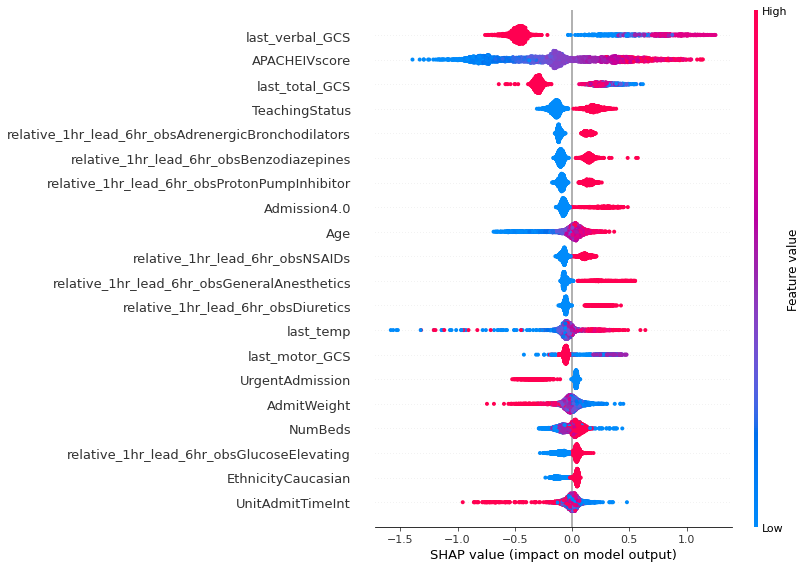

In [16]:
import shap
explainer = shap.TreeExplainer(catboost_result["imodels"][0])
temp_data = catboost_result["ipatid"][0].to_frame().merge(data, on="PatientStayID", how="inner")
shap_values = explainer.shap_values(temp_data.iloc[:, 1:])
shap.summary_plot(shap_values, temp_data.iloc[:, 1:], show=False)
plt.savefig("../figures/relative_1hr_lead_6hr_obs/mean_unpruned/catboost_shapley_plot_full.png", bbox_inches="tight")

In [47]:
clf